## End to End Machine Learning Project
#### for Machine Learning Housing Corporation, California

### Get the Data

### Download the data
Automating the process of loading the data is super useful to make the process modular and reusable.

In [2]:
# import libs

from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

# function to download and load the data
def load_hosuing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        print("File does not exist. Downloading from web...")
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))


# call the function to load the data
housing = load_hosuing_data()

### Sneak peak of the dataframe

In [4]:
# head() shows top 5 rows of data from the datset

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# info() method is used to get a quick overview of the data e.g. number of rows, attribute type, null values etc
# also this tells us how much memory space this dataset is occupying, which is also crucial information
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From above snapshot, we can say there are 10 attributes/features, nine of them being float datatype i.e. numerical and one is categorical i.e. ocean_proximity.

We can also see that total_bedrooms column has 207 missing values (Null values).

ocean_proximity is a categorical value, so we can find out what all categories are available for this attribute. 

We can use `value_counts()` method to display the categories and their counts.

In [ ]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

The `describe()` method shows a summary of numerical attributes.

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


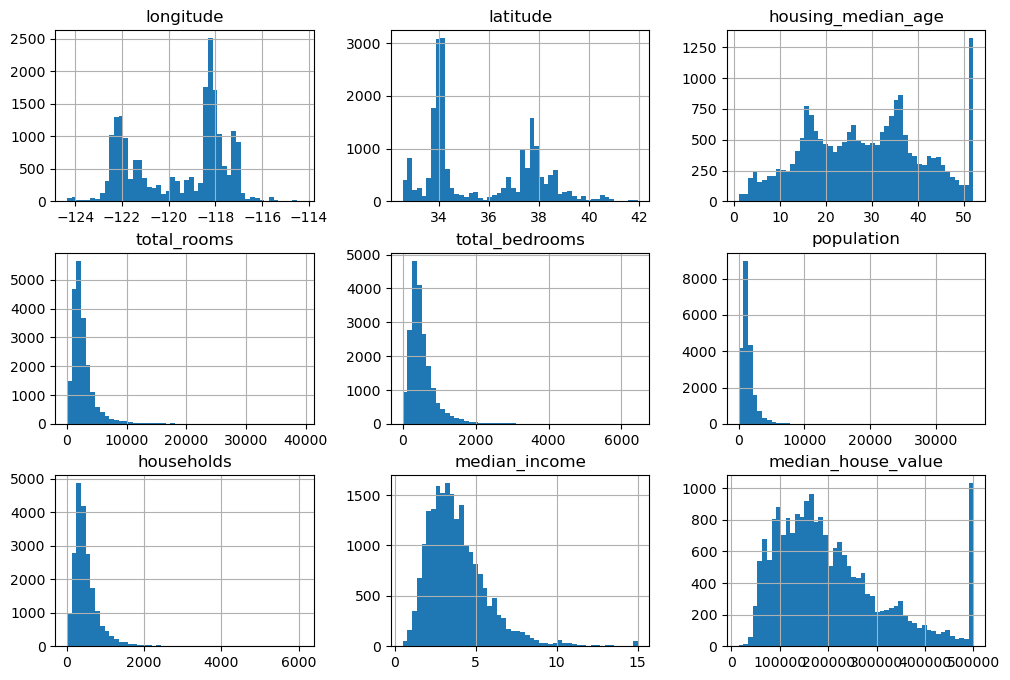

In [ ]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8))
plt.show()

### Create a Test Set

Typically we set aside approx 20% or less of the datset as test data. There are many approaches to create a test set and train set but we should take care of following points -
1. with each new dataset, the test and train data should not get affected
2. on each subsequent run of the program, the test data should not change or should not see the train data

In [9]:
# This is a very basic approach of creating test and train dataset

import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

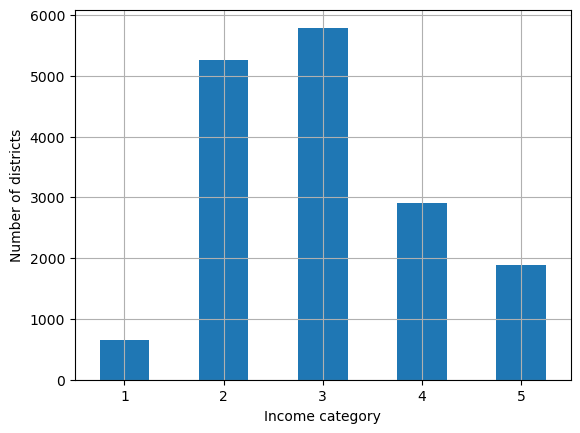

In [18]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

We can also use sckit learn package to create a test and train dataset

A common method to use is `train_test_split()`

In [19]:
from sklearn.model_selection import train_test_split


strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)
    

In [20]:
# we need to remove income_cat column as this is not going to be used now
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Exploring and Visualising The Data

We will create a copy of the training data, and henceforth we will only work with training data and not touch the test data.

In [21]:
housing = strat_train_set.copy()

housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13209 entries, 2875 to 19207
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13209 non-null  float64
 1   latitude            13209 non-null  float64
 2   housing_median_age  13209 non-null  float64
 3   total_rooms         13209 non-null  float64
 4   total_bedrooms      13071 non-null  float64
 5   population          13209 non-null  float64
 6   households          13209 non-null  float64
 7   median_income       13209 non-null  float64
 8   median_house_value  13209 non-null  float64
 9   ocean_proximity     13209 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


#### Geographical Visualisation
since we have longitue and latitude data, we can use a scatterplot to visualise this dataset

<Axes: xlabel='longitude', ylabel='latitude'>

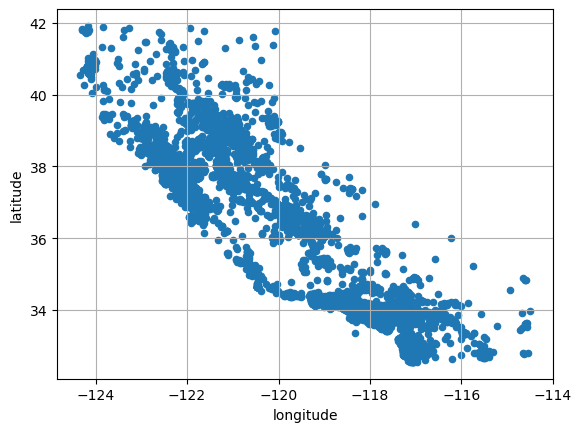

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)

This looks like the map of California which is obvious too, but this does not give any clear picture about the data in hand so we use `alpha` value to get more clarity.

This is useful when you have many overlapping points. Areas with a higher density of points will appear darker, giving you a sense of the data's distribution.

<Axes: xlabel='longitude', ylabel='latitude'>

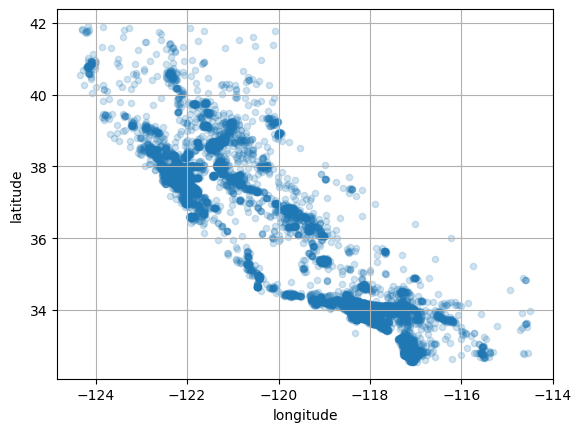

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)

So now we have a better picture that from our dataset the dense areas are located at certain points.

Next, we also introduce income data in this plot to corelate location with income.

<Axes: xlabel='longitude', ylabel='latitude'>

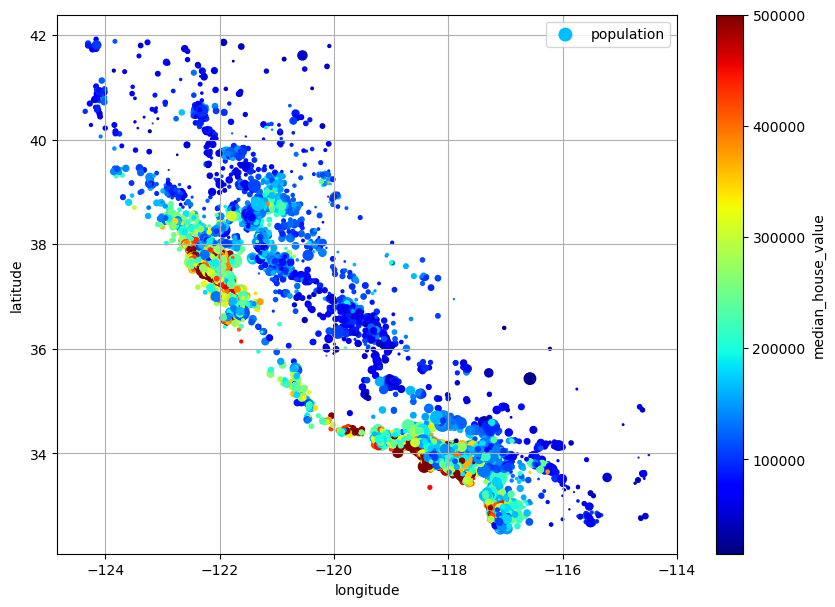

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/100, 
             label="population", c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10, 7))

From this plot, what looks evident is that housing prices are indeed corelated to the location espcially the coastal areas and population density.

### Finding Correlations

We can find out correlations between every pair of attributes using the `corr()` method of pandas df

In [32]:
corr_matrix = housing.corr(numeric_only=True)

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687823
total_rooms           0.132726
housing_median_age    0.102761
households            0.068516
total_bedrooms        0.051699
population           -0.023537
longitude            -0.053639
latitude             -0.138313
Name: median_house_value, dtype: float64

We can plot the scatter plot matrix of correlations among different pairs of attribues to get a glance view of correaltation at once and then take a good call on the relationship between attributes.

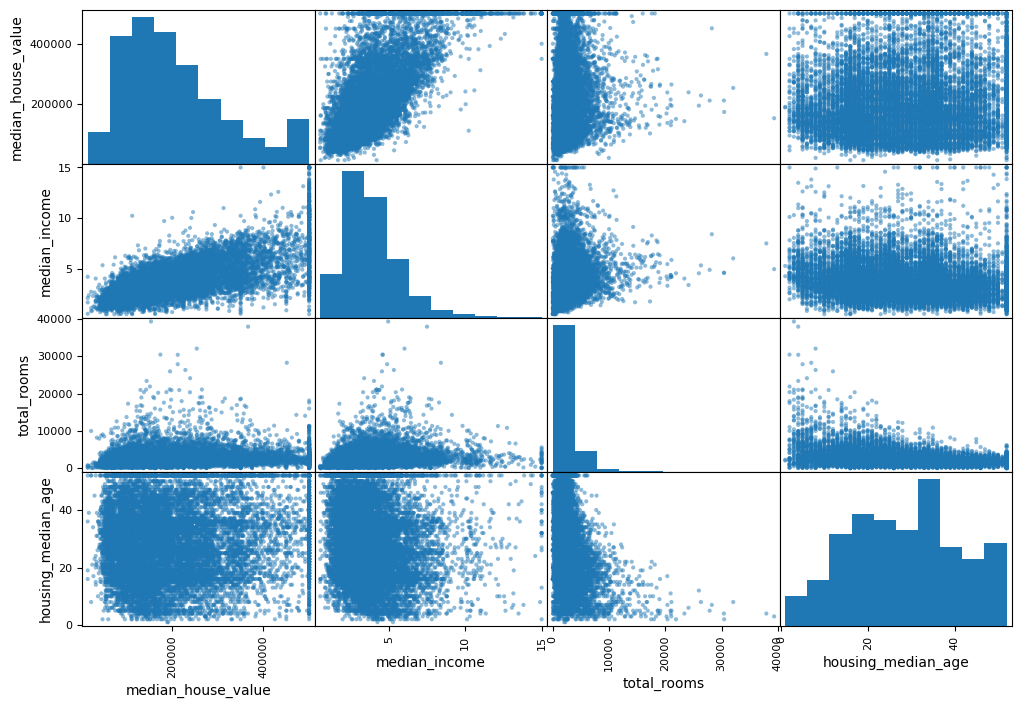

In [34]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

From the above plots, it is evident that the median_income is the standalone attribute having strong correlation with housing prices. So we can zoom in to this plot only.

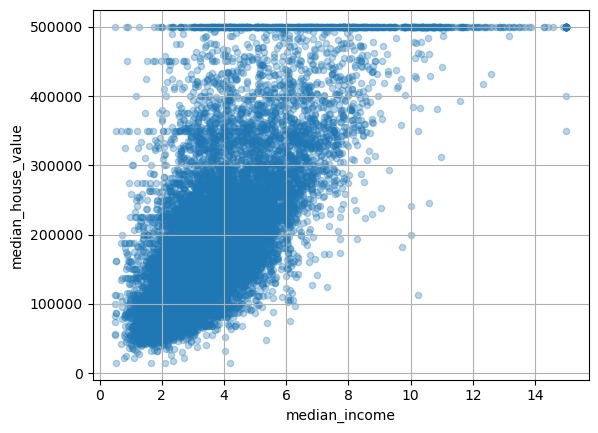

In [37]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3, grid=True)
plt.show()

The plot shows, that indeed on increasing median income, the media house value increases.
Also an observation here that there is a straight line along 500000 value, which is the capping we got to know earlier.

### Experimenting with Combinations of Attributes
So many a times an attribute does not look quite significant but if we try a combination of attributes (related ones) they might reveal some signification as combinated attributes. So lets just do a quick analysis of this theory. 

**Attribue 1**

Our first combination can be for total_rooms which has corr of 0.13 which is quite weak. But this total_rooms is the total number of rooms for the district, not for a household. And generally, we know that housing prices are dependent on number of rooms! 
So we can have a new attribute to denote the `rooms_per_house`

In [38]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]

**Attribute 2**

Second attribute combination to try can be the ratio of bedrooms because we know bedrooms are important factor to look in while buying a house. Here we try to find bedrooms ratio with total number of rooms. So having more space in house is going to be costly affair.

In [39]:
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]

**Attribute 3**

Third attribute combination to try can be number of people per household.   

In [40]:
housing["people_per_house"] = housing["population"] / housing["households"]

After introduing these 3 new attribute combinations, lets look at the correlation matrix.

In [42]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687823
rooms_per_house       0.143607
total_rooms           0.132726
housing_median_age    0.102761
households            0.068516
total_bedrooms        0.051699
population           -0.023537
people_per_house     -0.033193
longitude            -0.053639
latitude             -0.138313
bedrooms_ratio       -0.255405
Name: median_house_value, dtype: float64

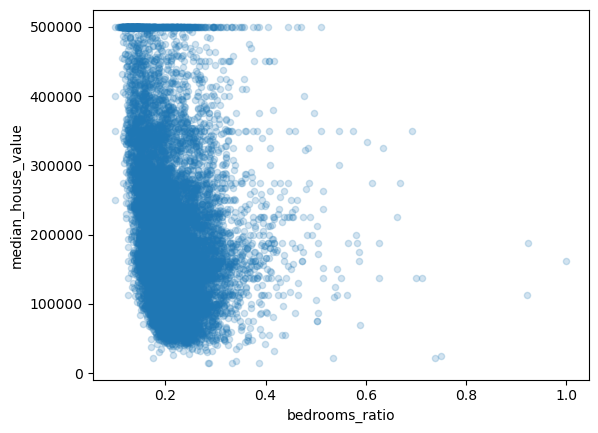

In [44]:
housing.plot(kind="scatter", x="bedrooms_ratio", y="median_house_value", alpha=0.2)
plt.show()

Imagine two houses:

House A: 4 bedrooms, 1 living room, 1 kitchen. High bedroom ratio.

House B: 4 bedrooms, 2 living rooms, 1 dining room, 1 kitchen. Lower bedroom ratio.

House B, with more diverse living spaces, might be more desirable and therefore have a higher value, even though both houses have the same number of bedrooms.

So basically after doing this combination of attributes, we now know that bedrooms ratio is imporant, also rooms_per_house is more significant than total_rooms. So quite some productive work here! :-)

### Preparing the data for Machine Learning
This is one of the crucial job of our workflow and also it is one of the most time consuming part and should be done carefully.

The very step is to revert to a clean training data and segregate Labels and Features.

Another common naming convention to follow is X_train, y_train

In [46]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop() will create a copy  by dropping median_house_value and original strat_train_set is not affected
housing_labels = strat_train_set["median_house_value"].copy()

#### Cleaning the data
There are three major approaches to clean the data:
1. get rid of the rows
2. get rid of the attributes
3. imputation

We prefer imputation here, which can be done manually also but we will use sklearn to perform this imputation for some good reasons.
`SimpleImputer` is our friend in cleaning the data.

In [47]:
from sklearn.impute import SimpleImputer

# create an instance with strategy as median, we can choose mean, mode, constant etc

imputer = SimpleImputer(strategy="median")

In [51]:
# Since the median can be calculated only for numerical values, so before we feed in the dataset to above imputer
# we need to transform our housing data to include only numerical attributes

housing_num = housing.select_dtypes(include=[np.number])

In [54]:
# Now we will fit the imputer with above numerical data
imputer.fit(housing_num)

print(imputer.statistics_)

[-118.52    34.27    29.    2120.     432.    1163.     407.       3.535]


The above step with `imputer.fit()` computed the median for each attribute and stored it in `statistics_` instance variable.

The reason we are doing this for the whole dataset instead of just total_bedrooms (which is the only one having Null values) because we do not know that in future other attributes might also have Null values and we do not want to manually check and perform imputation separately. So to be on safer side, we do this for all the attributes.

In [55]:
X = imputer.transform(housing_num)

type(X)

numpy.ndarray

So the imputer transformer took a Pandas DF as input but it gave a NumPy ndarray as output. So we will need to get back our Pandas DF.

In [56]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [59]:
# So printing the info shows that there is no Null values now

housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13209 entries, 2875 to 19207
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13209 non-null  float64
 1   latitude            13209 non-null  float64
 2   housing_median_age  13209 non-null  float64
 3   total_rooms         13209 non-null  float64
 4   total_bedrooms      13209 non-null  float64
 5   population          13209 non-null  float64
 6   households          13209 non-null  float64
 7   median_income       13209 non-null  float64
dtypes: float64(8)
memory usage: 928.8 KB


#### Handling Categorical Attributes
So far we imputed numerical attributes. When it comes to categorical data, machine learning models are not very great in working with this form. So we will need to convert this or encode this data to relevant numerical data.

In [61]:
housing_cat = housing[["ocean_proximity"]] # this is to get a DF instead of a Series
housing_cat.head(6)

,ocean_proximity
2875,NEAR BAY
15098,<1H OCEAN
11562,NEAR BAY
14648,NEAR BAY
1148,NEAR BAY
16163,INLAND


In [63]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:6]

array([[3.],
       [0.],
       [3.],
       [3.],
       [3.],
       [1.]])

This looks fine, but we have got some problem here. The algorithm will think these numbers are related by their order which is not true. For example, 0 is "<1 H ocean" and 4 is "near ocean" but numerically these are kind of opposite ends. 

To solve this problem, we will create one binary attribute per category. This is formaly known as **One Hot Encoding**

In [65]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13209 stored elements and shape (13209, 5)>

This will output Sklearn sparse matrix which is more efficient than a numpy array for this job.